In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import Augmentor

In [5]:

# Define paths
data_dir = r"data\Skin cancer ISIC The International Skin Imaging Collaboration" 
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Image parameters
IMG_SIZE = (180, 180)
BATCH_SIZE = 32

In [13]:

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255, validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False
)

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


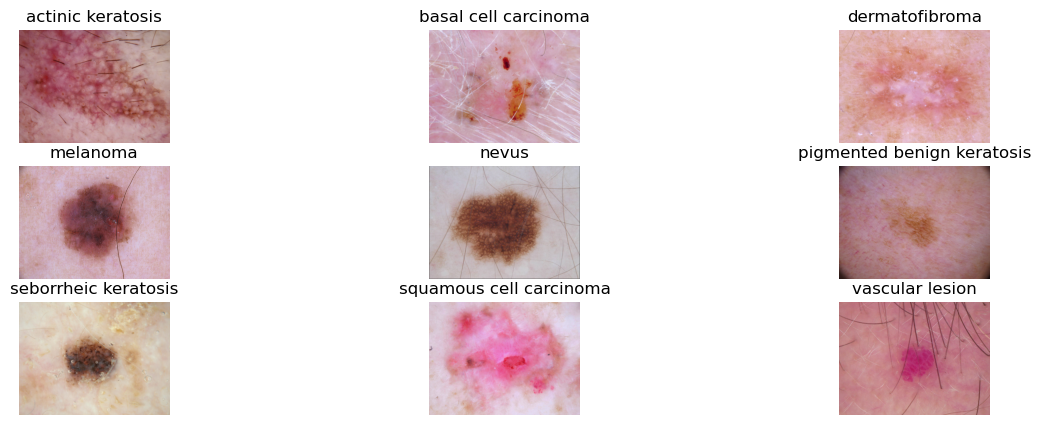

In [30]:
class_names = list(train_generator.class_indices.keys())
fig, axes = plt.subplots(3, 3, figsize=(15, 5))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_dir, class_name)
    image_path = os.path.join(class_dir, os.listdir(class_dir)[0])
    image = plt.imread(image_path)
    axes[i//3][i%3].imshow(image)
    axes[i//3][i%3].axis('off')
    axes[i//3][i%3].set_title(class_name)
plt.show()

In [6]:

# Model architecture
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()

# Train model
history = model.fit(
    train_generator, epochs=20, validation_data=val_generator
)

c:\Users\kaust\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\kaust\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 374ms/step - accuracy: 0.2056 - loss: 2.1536 - val_accuracy: 0.2703 - val_loss: 1.9441
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 345ms/step - accuracy: 0.2435 - loss: 1.9993 - val_accuracy: 0.2365 - val_loss: 1.9190
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 347ms/step - accuracy: 0.3354 - loss: 1.8190 - val_accuracy: 0.2387 - val_loss: 1.9986
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 344ms/step - accuracy: 0.3396 - loss: 1.8205 - val_accuracy: 0.3784 - val_loss: 1.6713
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 342ms/step - accuracy: 0.4733 - loss: 1.5356 - val_accuracy: 0.3694 - val_loss: 1.7060
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 343ms/step - accuracy: 0.4832 - loss: 1.4922 - val_accuracy: 0.4369 - val_loss: 1.6048
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 343ms/step - accuracy: 0.4850 - loss: 1.4559 - val_accuracy: 0.4257 - val_loss: 1.7004
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 353ms/step - accuracy: 0.5281 - loss: 1.3682 - val_accu

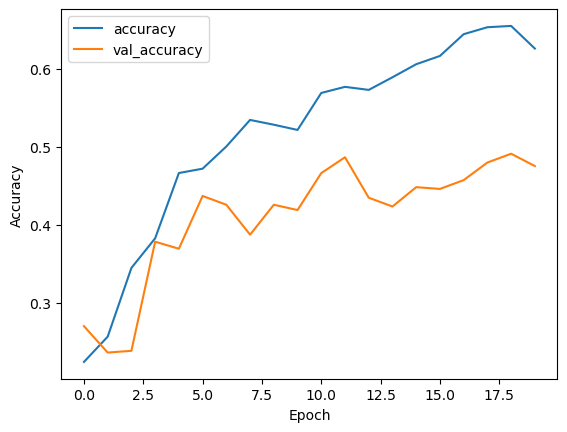

In [7]:
# Plot results
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history)

In [15]:
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(val_generator)
test_loss, test_acc = model.evaluate(test_generator)
print(f"Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")

c:\Users\kaust\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 350ms/step - accuracy: 0.7721 - loss: 0.6376
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step - accuracy: 0.4926 - loss: 1.7397
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.2739 - loss: 3.2688
Final Training Accuracy: 76.71%
Final Validation Accuracy: 47.52%
Final Test Accuracy: 33.05%


1. The gap between the training and testing accuracy seems to be increasing with the number of epochs.

#### The model has learned but does not generalize well (overfitting)

## Data augmentation for performance improvement.

In [8]:
datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_aug = datagen_augmented.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', subset='training'
)

val_generator_aug = datagen_augmented.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', subset='validation'
)

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


In [9]:
def create_augmented_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_aug = create_augmented_model()

history_aug = model_aug.fit(
    train_generator_aug, epochs=20, validation_data=val_generator_aug
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 466ms/step - accuracy: 0.1970 - loss: 2.2360 - val_accuracy: 0.2950 - val_loss: 1.9481
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 481ms/step - accuracy: 0.3188 - loss: 1.9022 - val_accuracy: 0.3176 - val_loss: 1.7833
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 453ms/step - accuracy: 0.3876 - loss: 1.7027 - val_accuracy: 0.3514 - val_loss: 1.7559
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 484ms/step - accuracy: 0.4115 - loss: 1.6780 - val_accuracy: 0.4122 - val_loss: 1.7767
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 480ms/step - accuracy: 0.4312 - loss: 1.6333 - val_accuracy: 0.4054 - val_loss: 1.9566
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 480ms/step - accuracy: 0.4516 - loss: 1.5609 - val_accuracy: 0.3716 - val_loss: 1.7891
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 478ms/step - accuracy: 0.4600 - loss: 1.5648 - val_accuracy: 0.4077 - val_loss: 1.8316
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 482ms/step - accuracy: 0.4933 - loss: 1.5304 - val_accu

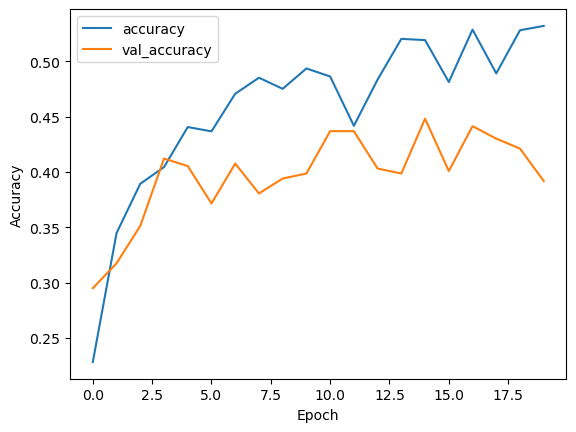

In [ ]:
plot_history(history_aug)

In [ ]:
train_loss, train_acc = model_aug.evaluate(train_generator_aug)
val_loss, val_acc = model_aug.evaluate(val_generator_aug)
test_loss, test_acc = model_aug.evaluate(test_generator)
print(f"Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")

57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 527ms/step - accuracy: 0.5352 - loss: 1.3502
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 527ms/step - accuracy: 0.4076 - loss: 2.2090


c:\Users\kaust\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.2819 - loss: 2.2925
Final Training Accuracy: 51.87%
Final Validation Accuracy: 40.54%
Final Test Accuracy: 25.42%


# Iteration with Data Augmetation to fix Class Imbalance

In [16]:
class_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name))) for class_name in os.listdir(train_dir)}
print("Class distribution:", class_counts)

least_common_class = min(class_counts, key=class_counts.get)
most_common_class = max(class_counts, key=class_counts.get)
print(f"Least common class: {least_common_class} ({class_counts[least_common_class]} samples)")
print(f"Most common class: {most_common_class} ({class_counts[most_common_class]} samples)")


Class distribution: {'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}
Least common class: seborrheic keratosis (77 samples)
Most common class: pigmented benign keratosis (462 samples)


In [ ]:
# perform oversampling for balancing the data

pipelined_augmentors = {}
for class_name in class_counts:
    p = Augmentor.Pipeline(os.path.join(train_dir, class_name))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
    p.flip_left_right(probability=0.5)
    p.sample(class_counts[most_common_class] - class_counts[class_name])  # Balance classes
    pipelined_augmentors[class_name] = p

# Data generators with augmentation
datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_aug = datagen_augmented.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', subset='training'
)

val_generator_aug = datagen_augmented.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False
)


Initialised with 114 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18A837783E0>: 100%|██████████| 348/348 [00:01<00:00, 228.61 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\train\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x18A8376F260>: 100%|██████████| 86/86 [00:00<00:00, 304.33 Samples/s]


Initialised with 95 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18AC058E3C0>: 100%|██████████| 367/367 [00:01<00:00, 300.10 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x18AC0529BB0>: 100%|██████████| 24/24 [00:01<00:00, 23.37 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x18AC0528C50>: 100%|██████████| 105/105 [00:01<00:00, 56.75 Samples/s]                 


Initialised with 462 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18AC060E840>: 100%|██████████| 462/462 [00:01<00:00, 295.12 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x18AC059F9E0>: 100%|██████████| 385/385 [00:02<00:00, 161.58 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18AC05D6750>: 100%|██████████| 281/281 [00:00<00:00, 303.92 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to data\Skin cancer ISIC The International Skin Imaging Collaboration\train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x18AC0544230>: 100%|██████████| 323/323 [00:01<00:00, 306.70 Samples/s]                  


Found 5604 images belonging to 9 classes.
Found 1397 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [23]:
history_aug = model_aug.fit(
    train_generator_aug, epochs=30, validation_data=val_generator_aug
)

c:\Users\kaust\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 125s 708ms/step - accuracy: 0.4222 - loss: 1.4454 - val_accuracy: 0.4975 - val_loss: 1.5724
Epoch 2/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 84s 476ms/step - accuracy: 0.4773 - loss: 1.3690 - val_accuracy: 0.5361 - val_loss: 1.4369
Epoch 3/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 65s 367ms/step - accuracy: 0.5077 - loss: 1.3200 - val_accuracy: 0.5662 - val_loss: 1.4413
Epoch 4/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 65s 369ms/step - accuracy: 0.4814 - loss: 1.3997 - val_accuracy: 0.5605 - val_loss: 1.3553
Epoch 5/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 65s 368ms/step - accuracy: 0.5201 - loss: 1.2700 - val_accuracy: 0.5562 - val_loss: 1.3523
Epoch 6/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 65s 369ms/step - accuracy: 0.5163 - loss: 1.2855 - val_accuracy: 0.5641 - val_loss: 1.3395
Epoch 7/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 65s 367ms/step - accuracy: 0.5298 - loss: 1.2644 - val_accuracy: 0.5812 - val_loss: 1.3528
Epoch 8/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 65s 368ms/step - accuracy: 0.5222 - loss: 

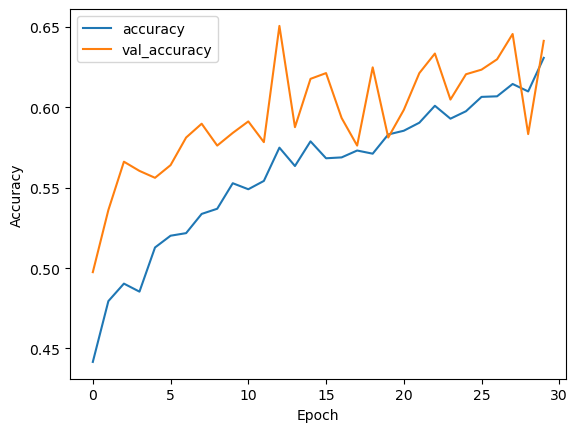

In [26]:
plot_history(history_aug)

In [24]:
train_loss, train_acc = model_aug.evaluate(train_generator_aug)
val_loss, val_acc = model_aug.evaluate(val_generator_aug)
test_loss, test_acc = model_aug.evaluate(test_generator)
print(f"Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Final Test Accuracy: {test_acc * 100:.2f}%") 

176/176 ━━━━━━━━━━━━━━━━━━━━ 42s 238ms/step - accuracy: 0.6864 - loss: 0.8608
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 298ms/step - accuracy: 0.6385 - loss: 1.1204


c:\Users\kaust\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4331 - loss: 3.1419  
Final Training Accuracy: 67.49%
Final Validation Accuracy: 65.21%
Final Test Accuracy: 49.15%


## The Final testing accuracy is much better than the previous iterations
## The model has improved overall